In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

#plt.style.use('dark_background')
plt.style.use('default')

df = pd.read_csv('data/clean_data.csv')
dates = df["date"]

cols = ['accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%', 'accuracy_all_%', 
        'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg', 'accuracy_all_avg']
df = df[cols]

df = (df - df.min()) / (df.max() - df.min())

Text(0.5, 1.0, 'accuracy_1_%')

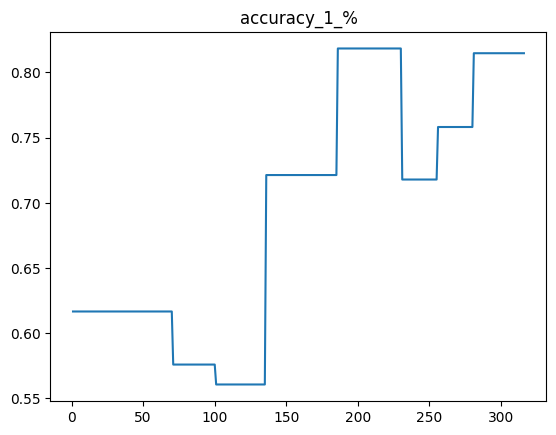

In [196]:
def in_period(x):
    flags = [x > diff_points[i] for i in range(len(diff_points)-1)]
    return sum(flags)

diff_points = [0, 70, 100, 135, 185, 230, 255, 280, 318]
means = []

target = 'accuracy_1_%'

for i in range(len(diff_points) - 1):
    means.append(df[diff_points[i]:diff_points[i+1]].mean())

x = list(range(1, 317))

plt.plot(x, [means[in_period(xi)-1][target] for xi in x])
plt.title(target)

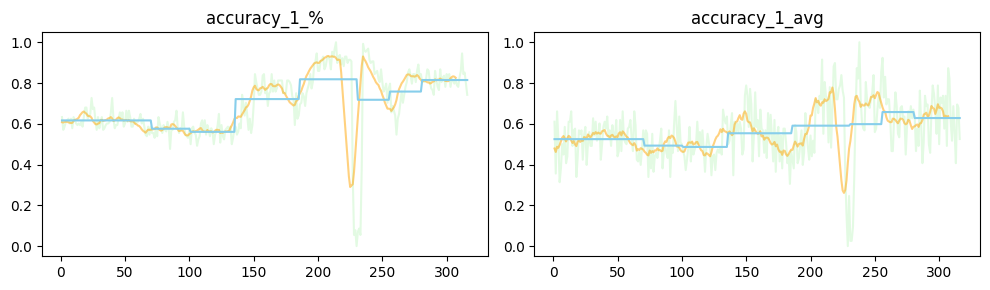

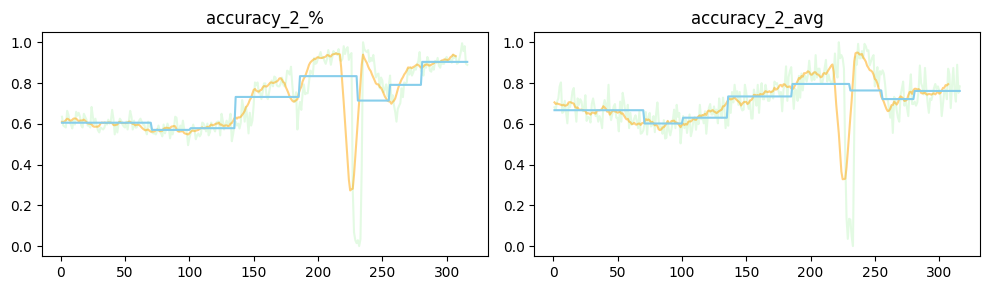

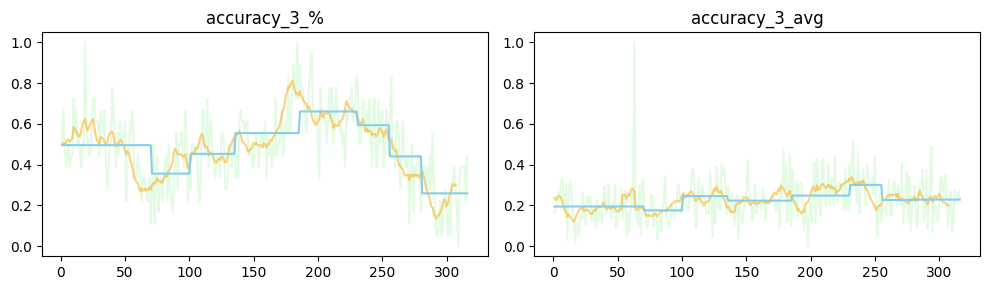

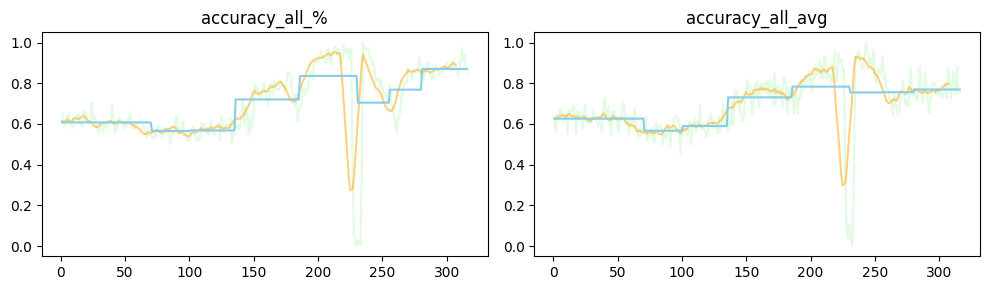

In [197]:
col_pairs = [['accuracy_1_%', 'accuracy_1_avg'],
            ['accuracy_2_%', 'accuracy_2_avg'],
            ['accuracy_3_%', 'accuracy_3_avg'],
            ['accuracy_all_%', 'accuracy_all_avg']]


x = list(range(1, 317))
alpha = 0.5

for i in range(4):

    col = col_pairs[i]

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)
    plt.plot(x, [means[in_period(xi)-1][col[0]] for xi in x], color='skyblue', zorder=2)
    plt.plot(x, df[1:317][col[0]], color='lightgreen', alpha=alpha/2, zorder=0)

    for window_size in [10]:
        smoothed = df[1:317][col[0]].rolling(window=window_size).mean()
        smoothed = [x for x in smoothed if not np.isnan(x)]
        plt.plot(x[0:307], smoothed, alpha=alpha, color='orange', zorder=1)


    plt.title(col[0])


    plt.subplot(1, 2, 2)
    plt.plot(x, [means[in_period(xi)-1][col[1]] for xi in x], color='skyblue', zorder=2)
    plt.plot(x, df[1:317][col[1]], color='lightgreen', alpha=alpha/2, zorder=0)
    
    for window_size in [10]:
        smoothed = df[1:317][col[1]].rolling(window=window_size).mean()
        smoothed = [x for x in smoothed if not np.isnan(x)]
        plt.plot(x[0:307], smoothed, alpha=alpha, color='orange', zorder=1)

    plt.title(col[1])
            

    plt.tight_layout()
    plt.show()

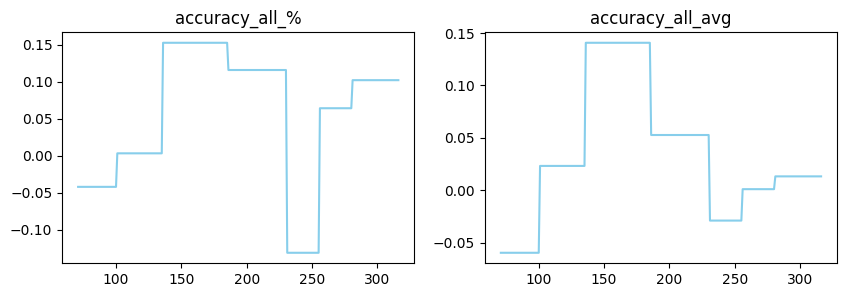

In [198]:
plt.figure(figsize=(10, 3))


plt.subplot(1, 2, 1)

target = "accuracy_all_%"
means_ratio1 = [means[_+1][target] - means[_][target] for _ in range(7)]
plt.title(target)
plt.plot(x[70:], [means_ratio1[in_period(xi)-2] for xi in x[70:]], color='skyblue', zorder=2)


plt.subplot(1, 2, 2)

target = "accuracy_all_avg"
means_ratio2 = [means[_+1][target] - means[_][target] for _ in range(7)]
plt.title(target)
plt.plot(x[70:], [means_ratio2[in_period(xi)-2] for xi in x[70:]], color='skyblue', zorder=2)

<BarContainer object of 246 artists>

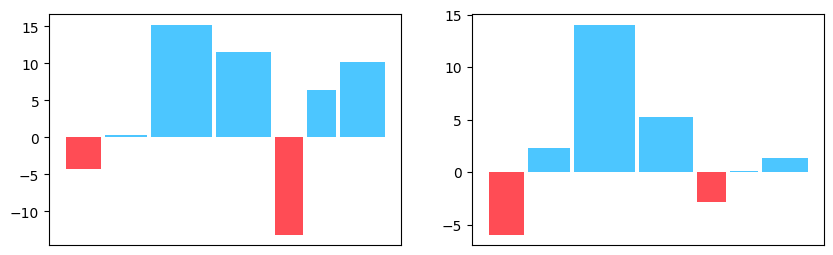

In [199]:
h = [0, 70, 69, 71, 100, 99, 101, 135, 134, 136, 185, 184, 186, 230, 229, 231, 255, 256, 254, 281, 280, 279, 318]

plt.figure(figsize=(10, 3))



plt.subplot(1, 2, 1)

y1 = [means_ratio1[in_period(xi)-2] * 100 if xi not in h else 0 for xi in x[70:]]
colors1 = np.where(np.array(y1) > 0, "#4CC6FF", '#FF4C55')
# plt.title("Среднее попадание в итоговый отчет \n данных из всех источников ")

# for day in [70, 100, 135, 185, 230, 255, 280, 318]:
#     plt.text(day, -15, dates.iloc[day], 
#              rotation=45, va='top', ha='right', color='black')
#     plt.axvline(x=day, ymax=0.025, color='black')

plt.gca().set_xticks([])
plt.bar(x[70:], y1, width=1, color=colors1)



plt.subplot(1, 2, 2)

y2 = [means_ratio2[in_period(xi)-2] * 100 if xi not in h else 0 for xi in x[70:]]
colors2 = np.where(np.array(y2) > 0, '#4CC6FF', '#FF4C55')
# plt.title("Среднее количество попавших в отчет \n записей из всех источников")

# for day in [70, 100, 135, 185, 230, 255, 280, 318]:
#     plt.text(day, -7.25, dates.iloc[day], 
#              rotation=45, va='top', ha='right', color='black')
#     plt.axvline(x=day, ymax=0.025, color='black')

plt.gca().set_xticks([])
plt.bar(x[70:], y2, width=1, color=colors2)

<Axes: >

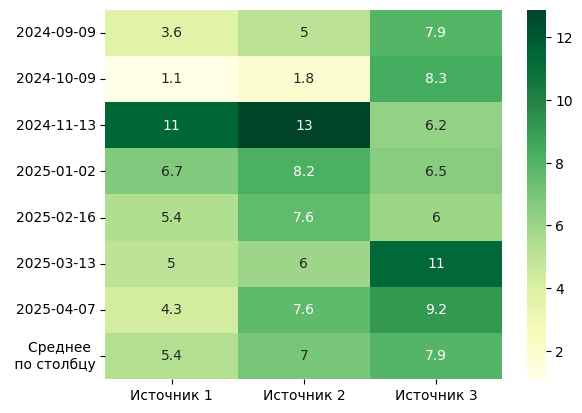

In [222]:
cols = ['accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%', 'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg']

dt = pd.DataFrame()

for col in cols:
    means_ratio = np.array([np.abs(means[_+1][col] - means[_][col]) for _ in range(7)])

    means_ratio = np.concatenate([means_ratio,  np.array([means_ratio.mean()])])

    dt[col] = means_ratio


dt2 = pd.DataFrame()
dt2["Источник 1"] = (np.abs(dt['accuracy_1_%']) + np.abs(dt['accuracy_1_avg'])) / 2
dt2["Источник 2"] = (np.abs(dt['accuracy_2_%']) + np.abs(dt['accuracy_2_avg'])) / 2
dt2["Источник 3"] = (np.abs(dt['accuracy_3_%']) + np.abs(dt['accuracy_3_avg'])) / 2


yticklabels = [dates.iloc[i] for i in [70, 100, 135, 185, 230, 255, 280]] + ["Среднее \n по столбцу"]

sns.heatmap(dt2 * 100, cmap='YlGn', annot=True, yticklabels=yticklabels)